In [37]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install ydata-profiling
from ydata_profiling import ProfileReport

In [38]:
ab = pd.read_csv("/home/isatish/projects/ab_testing_simulation/data/ab_data.csv")
countries = pd.read_csv("/home/isatish/projects/ab_testing_simulation/data/countries.csv")

In [39]:
print("AB Test shape:", ab.shape)
print("Countries shape:", countries.shape)

AB Test shape: (294480, 5)
Countries shape: (290586, 2)


In [40]:
ab.head()

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


In [41]:
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [42]:
#merge both dataframes on 'user_id'
df = pd.merge(ab, countries, on='user_id', how='left')
print("Merged DataFrame shape:", df.shape)

Merged DataFrame shape: (294482, 6)


In [43]:
display(df.head())

,user_id,timestamp,group,landing_page,converted,country
0,851104,11:48.6,control,old_page,0,US
1,804228,01:45.2,control,old_page,0,US
2,661590,55:06.2,treatment,new_page,0,US
3,853541,28:03.1,treatment,new_page,0,US
4,864975,52:26.2,control,old_page,1,US


In [44]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294482 entries, 0 to 294481
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294482 non-null  int64 
 1   timestamp     294482 non-null  object
 2   group         294482 non-null  object
 3   landing_page  294482 non-null  object
 4   converted     294482 non-null  int64 
 5   country       294482 non-null  object
dtypes: int64(2), object(4)
memory usage: 13.5+ MB
None
user_id         0
timestamp       0
group           0
landing_page    0
converted       0
country         0
dtype: int64


In [55]:
#generate profile report
profile = ProfileReport(df, title="AB Testing Data Profiling Report", explorative=True)

In [56]:
profile.to_file(
    "/home/isatish/projects/ab_testing_simulation/outputs/ab_testing_data_profiling_report.html"
)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████| 6/6 [00:01<00:00,  4.62it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [46]:
#basic summary statistics
print(df.describe(include='all'))


              user_id timestamp      group landing_page      converted country
count   294482.000000    294482     294482       294482  294482.000000  294482
unique            NaN     35993          2            2            NaN       3
top               NaN   33:53.2  treatment     new_page            NaN      US
freq              NaN        22     147280       147243            NaN  206368
mean    787973.348225       NaN        NaN          NaN       0.119658     NaN
std      91210.636700       NaN        NaN          NaN       0.324561     NaN
min     630000.000000       NaN        NaN          NaN       0.000000     NaN
25%     709032.250000       NaN        NaN          NaN       0.000000     NaN
50%     787931.500000       NaN        NaN          NaN       0.000000     NaN
75%     866910.750000       NaN        NaN          NaN       0.000000     NaN
max     945999.000000       NaN        NaN          NaN       1.000000     NaN


In [47]:
group_summary = df.groupby("group")["converted"].agg(["count", "mean"]).reset_index()
country_summary = (
    df.groupby("country")["converted"].mean().sort_values(ascending=False).reset_index()
)

In [48]:
print(group_summary)
print(country_summary.head())

       group   count      mean
0    control  147202  0.120399
1  treatment  147280  0.118916
  country  converted
0      UK   0.120582
1      US   0.119597
2      CA   0.115890


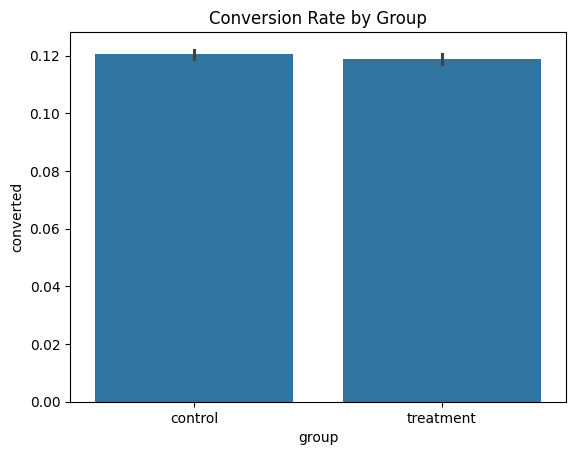

In [49]:
# #plot conversion rates by group
sns.barplot(x='group', y='converted', data=df)
plt.title("Conversion Rate by Group")
plt.show()

In [52]:
# df to csv
df.to_csv("/home/isatish/projects/ab_testing_simulation/data/ab_merged_data.csv", index=False)